<a href="https://colab.research.google.com/github/369koushil/ML_algos/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [5]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X=df.iloc[:,:4]
y=df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.shape

(120,)

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
boost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50)
boost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [20]:
y_predicted=boost.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_predicted,y_test))
print(classification_report(y_predicted,y_test))
print(confusion_matrix(y_predicted,y_test))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

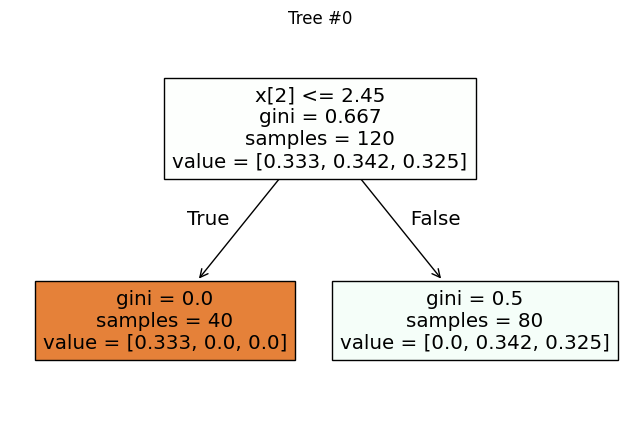

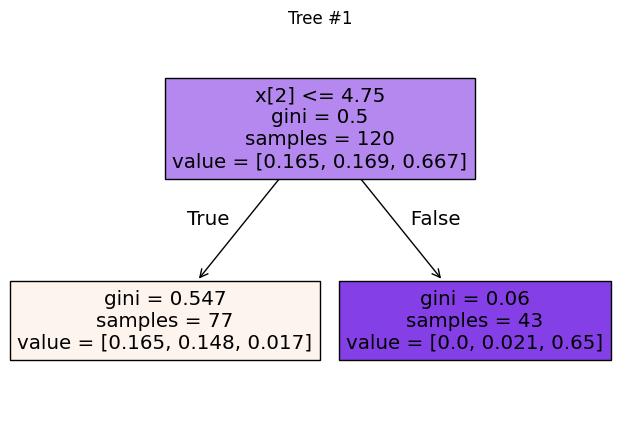

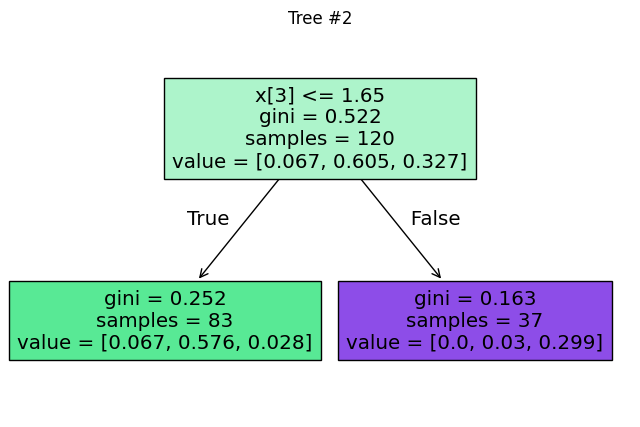

In [29]:
for i, tree in enumerate(boost.estimators_[:3]):
    plt.figure(figsize=(8, 5))
    plot_tree(tree, filled=True)
    plt.title(f"Tree #{i}")
    plt.show()